# 송인욱 과제

In [1]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
weather_df = pd.read_csv('../Data/daegu_utf8.csv')
print(weather_df.head())

           날짜   지점  평균기온  최저기온  최고기온
0  1909-01-01  143  -4.1  -8.0   0.1
1  1909-01-02  143  -0.8  -6.7   6.1
2  1909-01-03  143   1.0  -2.4   3.6
3  1909-01-04  143   4.2   0.0   9.2
4  1909-01-05  143   3.4  -0.4   9.0


In [3]:
def meanTemp(start_year, finish_year, month):
    pd.set_option('mode.chained_assignment', None)
    
    if int(start_year) > int(finish_year):
        raise Exception('year error')

    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'])

    year_df = weather_df[weather_df['날짜'].dt.year >= int(start_year)]
    year_df2 = year_df[year_df['날짜'].dt.year <= int(finish_year)]

    month_df = year_df2[year_df2['날짜'].dt.month == int(month)]
    valDF = month_df
    valDF['연도'] = valDF['날짜'].dt.year
    year_mean = valDF.groupby('연도').mean().reset_index()

    date = list(year_mean['연도'])
    max_mean = list(year_mean['최고기온'])
    min_mean = list(year_mean['최저기온'])

    print(f'{start_year}년 부터 {finish_year}년 까지 {month}월의 기온 변화')
    print(f'{month}월 최저기온 평균:')
    minStr = str(round(min_mean[0],2))
    for i in min_mean[1:]:
        minStr = minStr + ', ' + str(round(i,2))
    print(minStr)

    print(f'{month}월 최고기온 평균:')
    maxStr = str(round(max_mean[0],2))
    for i in max_mean[1:]:
        maxStr = maxStr + ', ' + str(round(i,2))
    print(maxStr)

    # 폰트설정
    system_name = platform.system()
    if system_name == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    elif system_name == 'Darwin':
        plt.rc('font', familly='AppleGothic')
    elif system_name == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
        font_name = fm.FontProperties(fname=path, size=12)
        plt.rc('font', family=font_name)
    else:
        raise Exception('not support')
    plt.rcParams['axes.unicode_minus'] = False

    # 그래프 그리기
    plt.figure(figsize=(15,7))
    plt.plot(date, max_mean, label='최고기온', marker='s', color='r')
    plt.plot(date, min_mean, label='최저기온', marker='o', color='b')
    plt.title(f'{start_year}년 부터 {finish_year}년 까지의 {month}월의 기온 변화')
    plt.legend()
    plt.show()

2001년 부터 2015년 까지 7월의 기온 변화
7월 최저기온 평균:
24.1, 22.76, 19.8, 23.42, 22.99, 21.52, 21.45, 24.79, 21.32, 23.45, 23.39, 23.72, 25.07, 23.14, 21.3
7월 최고기온 평균:
31.96, 30.4, 26.15, 31.91, 30.82, 27.74, 28.84, 33.06, 29.38, 31.29, 31.28, 32.07, 33.28, 31.93, 29.48


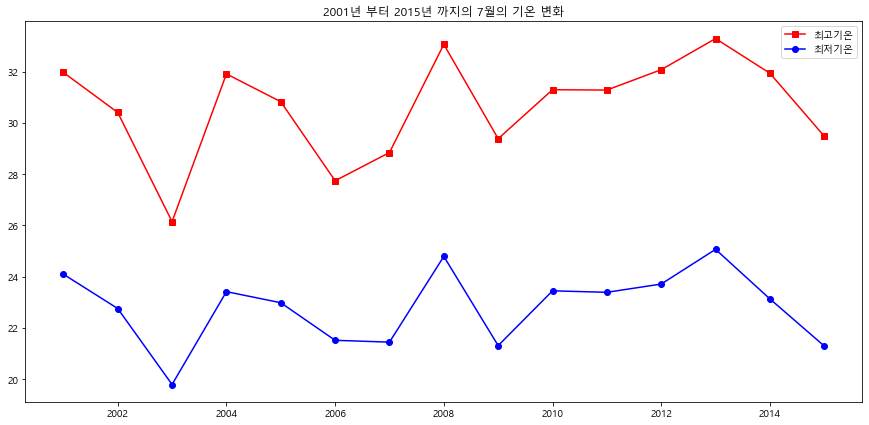

In [4]:
start_year = input('시작 연도를 입력하세요')
finish_year = input('마지막 연도를 입력하세요')
month = input('기온 변화를 측정할 달을 입력하세요')

meanTemp(start_year, finish_year, month)